## MCP for Finance - Stock Researcher Agent

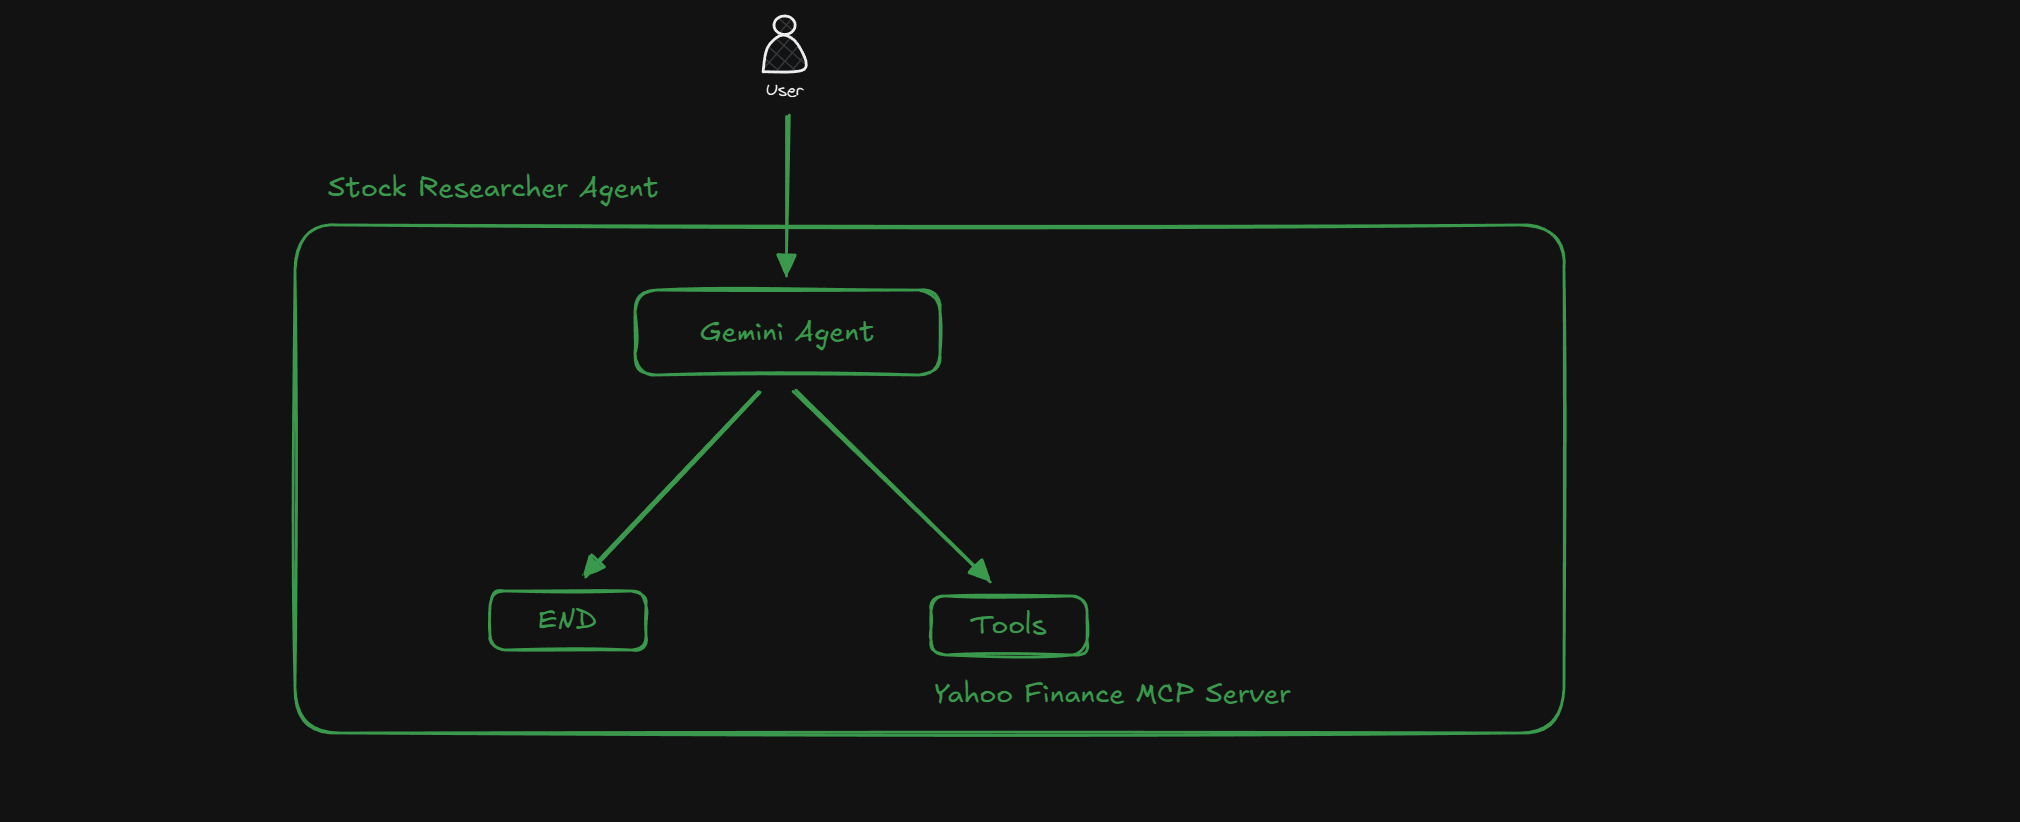

### Yahoo Finance Research Tool

In [17]:
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
from dotenv import load_dotenv
load_dotenv()

from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.agents import create_agent
from langchain.agents.middleware import TodoListMiddleware
from langchain_core.messages import HumanMessage
from langchain_core.tools import tool

import subprocess
import sys

In [ ]:
@tool
def finance_research(query):
    """Research stocks using Yahoo Finance MCP async function."""

    code = f"""
import asyncio
from yahoo_mcp import finance_research
asyncio.run(finance_research("{query}"))
"""
    
    result = subprocess.run([sys.executable, '-c', code], capture_output=True, text=True)

    return result.stdout

In [ ]:
query = "What is the current stock price of Apple (AAPL)?"
response = finance_research.invoke({"query": query})

print(response)

### Stock Researcher Agent

#### System Prompt

In [18]:
system_prompt = """You are a professional stock research analyst specializing in financial analysis.

**Your Responsibilities:**
1. Analyze stock performance and financial metrics
2. Research company fundamentals
3. Provide data-driven investment recommendations

**Analysis Framework:**
- Company name and ticker symbol
- Current stock price
- Key metrics: P/E ratio, Market Cap, Revenue
- Financial health assessment
- Clear recommendation: Buy, Hold, or Sell

**Important Guidelines:**
- Only respond to finance and stock market related questions
- For non-finance questions, politely decline: "I apologize, but I can only assist with stock market and financial analysis questions. Please ask me about stocks, companies, or financial metrics."
- Always cite specific data and metrics
- Maintain professional and objective tone

Provide concise, actionable insights for investors."""

#### Create Agent

In [20]:
from langchain.agents.middleware import TodoListMiddleware

model = ChatGoogleGenerativeAI(model="gemini-2.5-flash")

agent = create_agent(
    model=model,
    tools=[finance_research],
    system_prompt=system_prompt,
    middleware=[TodoListMiddleware()]
)

#### Run Agent

In [21]:
response = agent.invoke({"messages": [HumanMessage("What is the weather today?")]})
response
# print(response["messages"][-1].text)

{'messages': [HumanMessage(content='What is the weather today?', additional_kwargs={}, response_metadata={}, id='5e81a6b8-bea5-4f7c-b48f-931cae3ede53'),
  AIMessage(content='I apologize, but I can only assist with stock market and financial analysis questions. Please ask me about stocks, companies, or financial metrics.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--c9a5d52f-3d2a-46ee-b18e-63ec2874f950-0', usage_metadata={'input_tokens': 1388, 'output_tokens': 28, 'total_tokens': 1416, 'input_token_details': {'cache_read': 0}})]}

In [25]:
response = agent.invoke({"messages": [HumanMessage("Analyze Apple (AAPL) stock and its competitors like MSFT and Google. Present data clearly in the table.")]})

In [26]:
response

{'messages': [HumanMessage(content='Analyze Apple (AAPL) stock and its competitors like MSFT and Google. Present data clearly in the table.', additional_kwargs={}, response_metadata={}, id='9ec562ee-7806-4061-9ac8-c184c03a976f'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'write_todos', 'arguments': '{"todos": [{"status": "in_progress", "content": "Research Apple (AAPL) stock data."}, {"status": "in_progress", "content": "Research Microsoft (MSFT) stock data."}, {"status": "in_progress", "content": "Research Alphabet (GOOGL) stock data."}, {"status": "pending", "content": "Compile and present data in a table."}, {"status": "pending", "content": "Provide financial health assessment."}, {"status": "pending", "content": "Offer investment recommendations."}]}'}, '__gemini_function_call_thought_signatures__': {'bc907de7-660f-43fe-bafb-d9a7d75aeeb8': 'CrEHAXLI2nyI/FLUTCBYM2GABDYAW1c5fNRzVRaw/r4IMpKfu7ZfdpbJKsrdlioHjFCwKNCKZ6RdjOS229FOg/Q+dQkJWuW6/il8mpGz5tTlt9zSRYFy

In [27]:
print(response["messages"][-1].text)

## Stock Analysis: Apple (AAPL), Microsoft (MSFT), and Alphabet (GOOGL)

Here is a comparative analysis of Apple (AAPL), Microsoft (MSFT), and Alphabet (GOOGL) based on current financial data:

| Metric                | Apple (AAPL)          | Microsoft (MSFT)      | Alphabet (GOOGL)      |
| :-------------------- | :-------------------- | :-------------------- | :-------------------- |
| **Current Price**     | $278.70               | $480.97               | $317.495              |
| **Market Cap**        | $4.136 Trillion       | $3.575 Trillion       | $3.846 Trillion       |
| **P/E Ratio (TTM)**   | 37.36                 | 34.18                 | 31.40                 |
| **Total Revenue**     | $416.16 Billion       | (Not directly available in summary) | $385.476 Billion      |
| **Debt to Equity**    | 152.41%               | (Not directly available in summary) | 11.42%                |
| **Profit Margins**    | 26.92%                | (Not directly available in summary) | 32.2